In [2]:
#Goal: find names from papers and return geometries
#Need IAU nomenclature site to fix sending names with spaces!!!
#But really this might help to define IAU REST gazetter service for website. E.g. send name return geom.
#Trent Hare, thare@usgs.gov

from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import ogr
#%pylab inline

#send feature name
name = "Abbe"
name =  "4453" #Olympus Mons - Method can't handle spaces. Requested a fix

#IAU nomenclture URL
urlIAU = "https://planetarynames.wr.usgs.gov/Feature/"
url = urlIAU + name
print "url to call: " + url

url to call: https://planetarynames.wr.usgs.gov/Feature/4453


In [4]:
#request html page from USGS gaz.
r = requests.get(url)
data = r.text
soup = BeautifulSoup(data, "lxml")

#print HTML to show contents were found
#uncomment this for show
#print soup

In [5]:
#get name incase a number was sent
#<h2>Olympus Mons</h2>
feature_panel = soup.findAll('table', {'class': 'feature_detail'})
#print feature_panel
for feature in feature_panel:
    try:
        name = feature.find('h2').text
        print "feature found: " + name
    except AttributeError:
        continue

feature found: Olympus Mons


In [6]:
list1 = soup.body.findAll(text=re.compile('MULTIPOLYGON'))

#hacky method to get polygon string
str1 = ''.join(list1)
#print alist
splitList = str1.split('\n')
for item in splitList:
    if item.find("MULTIPOLYGON") != -1:
        geomStr = item.split('\'')[1]
        
#print only first 100 chars
print geomStr[0:100]

MULTIPOLYGON (((223.78717231750488 23.3314151763916, 224.22803688049316 23.324007034301758, 224.3243


In [7]:
#Use GDAL's ogr for convert to a polygon.
#This can now be converted to a GIS shapefile or other format
geomOGR = ogr.CreateGeometryFromWkt(geomStr)

#print whole geometry
print geomOGR

MULTIPOLYGON (((223.787172317505 23.3314151763916,224.228036880493 23.3240070343018,224.324361801147 23.5648136138916,224.718698501587 23.5935649871826,224.794862747192 23.4573764801025,225.065305709839 23.2387981414795,225.672552108765 23.4371967315674,226.221185684204 23.6611385345459,226.547201156616 23.6537265777588,227.621576309204 23.4351482391357,228.190095901489 23.3902835845947,228.753023147583 23.2495517730713,228.907117843628 23.1943416595459,229.232191085815 23.0049266815186,229.528814315796 22.7551403045654,229.872270584106 22.4429035186768,230.246953964233 22.1462802886963,230.730916976929 21.9277172088623,231.308549880981 21.64670753479,231.854959487915 21.0846843719482,232.198419570923 19.8825817108154,231.886182785034 18.4775257110596,231.308549880981 17.7437725067139,231.218873977661 17.218599319458,231.178121566772 16.751802444458,230.973466873169 16.3536701202393,230.832735061646 15.9471111297607,230.629453659058 15.4780025482178,230.457448959351 15.3529071807861,23

Populating the interactive namespace from numpy and matplotlib


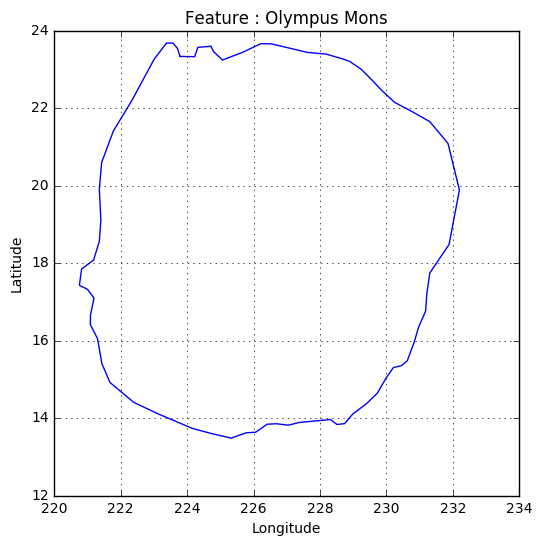

In [8]:
#Grab pylab for plotting
from matplotlib import pylab
import json

#setup pylab
%pylab inline

#setup plot size
figsize(6,6)

#should just print polygon but need help to do this
#here we will grab a list of X,Y vertices from a json string.

#Pts = geomOGR.GetPoints
coords = json.loads(geomOGR.ExportToJson())['coordinates'][0]
x = [i for i,j in coords[0]]
y = [j for i,j in coords[0]]

plot(x, y, 'b')
pylab.xlabel('Longitude')
pylab.ylabel('Latitude')
pylab.title('Feature : ' + name)
grid()

In [ ]:
#now loop over papers, find names and return geometries
#Need IAU nomenclature site to fix sending names with spaces!!!

#todo
# - add to map
# - grab target, add WMS layer
# - store all geoms somewhere